Project: Investigate a Dataset - tmdb-movies

Introduction

Dataset Description:
    The dataset selected for this project is the tmdb-movies dataset.  In this dataset, movie information from over 10,000 movies released between the years 1960 - 2015 are listed in various columns such as, id, imdb id, popularity, budget, revenue, title, cast, homepage, director, tagline, keywords, overview, runtime, genre, production companies, release date, release year, vote count, vote average, release year, adjusted budget, and adjusted revenue.  The id columns act as a way to index and identify each movie by a unique identifier.  Popularity is an indicator of how viewers rated the movie according to their taste.  The budget and revenue columns tell us how much money was spent making the movie, and how much money the movie made in theaters.  The title, cast, director, tagline, production companies, and overview columns all give us different pieces of information such as what the movie was called, and the cast and crew used to make a market the movie.  The release date and release year tell us when the movie was released into the theaters.  Runtime tells us how long the movie will show for once you start the movie.  The genre tells us how the production companies and theaters marketed the movie such as comedy or drama.  the vote count and vote average tell us how many people participated in the survey for that movie and what their average score was.
    
   Question for Analysis:
   Which year had the best profits for the movie industry?

First, I loaded all of the relevant libraries into the notebook so we could use them throughout the analysis without needing to call each library individually.

In [1]:
#This section will import the unicode, numpy, pandas and matplot libraries for use throughout the project
#Each library has been renamed with common convention to call functions easier throughout the project
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Wrangling

General Properties

In the cell below, the data is imported into the notebook using Pandas built in function. The dataframe created from the csv will be labeled as movies_df from this point forward.

In [7]:
#We define a function to easily bring any files into our notebook for the analysis

def read_file(filename):
    return pd.read_csv(filename)

In [8]:
#Here we create the dataframe, and call the dataframe to check that our function has worked correctly.

movies_df = read_file('tmdb-movies.csv')
movies_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [2]:
#This line will call pandas to import and read the csv file, and create a dataframe
#The dataframe of the entire csv will be labeled as movies_df to maintain standard convention

#movies_df = pd.read_csv('tmdb-movies.csv')

Data Cleaning

The dataframe is then cleaned of any columns that are not being used for reference, analysis, or for any purpose of this notebook.

In [9]:
#This line will search the dataframe for the coloumns listed, and remove the columns from the dataframe

movies_df = movies_df.drop(['imdb_id','cast','director','homepage','tagline','keywords','overview','runtime','production_companies','release_date','vote_count','vote_average',], axis = 1)

#Here we are checking the above line of code worked correctly

movies_df

,id,popularity,budget,revenue,original_title,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Documentary,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,Action|Adventure|Drama,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Mystery|Comedy,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Action|Comedy,1966,0.000000e+00,0.000000e+00


We need to now handle any movies that can skew our data incorrectly.  There are many rows that are missing either budget or revenue data, so we will choose to remove those values for the purpose of this project.

In [10]:
#These lines will search the listed columns for any zero values, and will remove those rows from the dataframe

movies_df = movies_df[movies_df['budget'] != 0]
movies_df = movies_df[movies_df['revenue'] != 0]

#We call the dataframe again to make sure the rows were dropped correctly
movies_df

,id,popularity,budget,revenue,original_title,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
10822,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Drama,1966,5.038511e+07,2.266436e+08
10828,5780,0.402730,3000000,13000000,Torn Curtain,Mystery|Thriller,1966,2.015404e+07,8.733419e+07
10829,6644,0.395668,4653000,6000000,El Dorado,Action|Western,1966,3.125892e+07,4.030809e+07
10835,5923,0.299911,12000000,20000000,The Sand Pebbles,Action|Adventure|Drama|War|Romance,1966,8.061618e+07,1.343603e+08


Immediately, we can see that our total number of rows dropped from 10,866 to 3,855, a 64.5% loss of data rows.

Data Analysis

Two new columns are added in order to answer the first question, "Which year had the best profits?".  The columns profit and profit_adj will show the profits for each movie, and the profits for each movie adjusted for 2010 dollars respectively.

In [11]:
#These two lines are creating a new column in the dataframe and inserting them in the values listed after the opening bracket
#We are creating 2 columns, profit and adjusted profit
#These lines are performing vectorized operations on the dataframe, subtracting the budget column from the revenue column to 
#find the profits of the movie

movies_df.insert(4,'profit',movies_df['revenue'] - movies_df['budget'], True)
movies_df.insert(5,'profit_pct', (((movies_df['revenue'] - movies_df['budget']) / movies_df['revenue']) * 100).round(2), True)
movies_df.insert(8,'profit_adj', movies_df['revenue_adj'] - movies_df['budget_adj'], True)

#Here we check to see if the columns were created and inserted correctly

movies_df

,id,popularity,budget,revenue,profit,profit_pct,original_title,genres,profit_adj,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,1363528810,90.09,Jurassic World,Action|Adventure|Science Fiction|Thriller,1.254446e+09,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,228436354,60.36,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2.101614e+08,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,185238201,62.74,Insurgent,Adventure|Science Fiction|Thriller,1.704191e+08,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,1868178225,90.33,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,1.718723e+09,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,1316249360,87.39,Furious 7,Action|Crime|Thriller,1.210949e+09,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,0.670274,7500000,33736689,26236689,77.77,Who's Afraid of Virginia Woolf?,Drama,1.762585e+08,1966,5.038511e+07,2.266436e+08
10828,5780,0.402730,3000000,13000000,10000000,76.92,Torn Curtain,Mystery|Thriller,6.718015e+07,1966,2.015404e+07,8.733419e+07
10829,6644,0.395668,4653000,6000000,1347000,22.45,El Dorado,Action|Western,9.049166e+06,1966,3.125892e+07,4.030809e+07
10835,5923,0.299911,12000000,20000000,8000000,40.00,The Sand Pebbles,Action|Adventure|Drama|War|Romance,5.374412e+07,1966,8.061618e+07,1.343603e+08


Basic statistics are then calculated and observed with Pandas .describe() function.  Immediately, several issues can be observed from just these statistics.  First, the minimum of both profti columns are negative, which would indicate that at least 1 movie lost a considerable amount of money.  Second, the standard deviation of the columns are massive, which indicates an enormous gap between each deviation.

In [12]:
#We use the .describe() function here to find the basic statistics of our 2 created columns

movies_df[['profit', 'profit_adj']].describe()

,profit,profit_adj
count,3.855000e+03,3.855000e+03
mean,7.045710e+07,9.279309e+07
std,1.506085e+08,1.940562e+08
min,-4.139124e+08,-4.139124e+08
25%,-1.325776e+06,-1.507157e+06
50%,2.000718e+07,2.736550e+07
75%,8.168326e+07,1.074152e+08
max,2.544506e+09,2.750137e+09


In the following cells, the histograms for the profit and profit_adj columns are shown to visualize the statistics from the describe function.  We can see from the histograms the data listed in the cells above.  We can see from this visualization that many of our movies fall very close to the median point of the histogram, which is what we want to see.

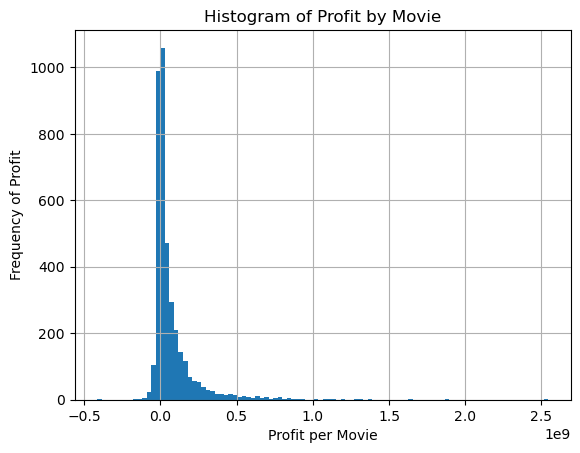

In [29]:
#This line will call matplot to create a histogram of the profit column, using the statistics calculated above

movies_df.hist(column='profit', bins=100)
plt.title('Histogram of Profit by Movie')
plt.xlabel('Profit per Movie')
plt.ylabel('Frequency of Profit')
plt.show()

This histogram shows that most of the movie profits fall right around the median value of the profits.  There are a few movies that exceeded the average profit as shown by the smaller blue bars above the 1.0 mark.

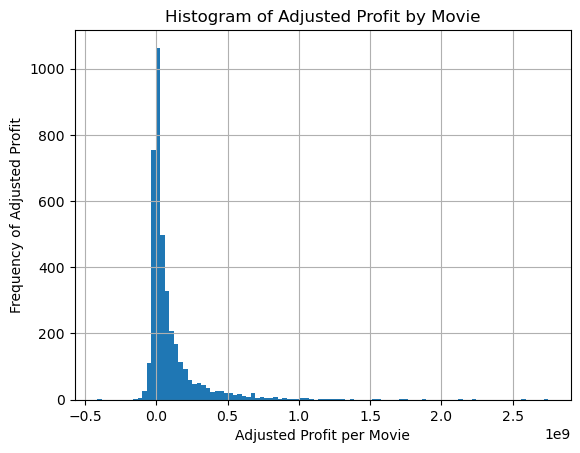

In [30]:
#This line will call matplot to create a histogram of the adjusted profit column, using the statistics calculated above

movies_df.hist(column='profit_adj', bins=100)
plt.title('Histogram of Adjusted Profit by Movie')
plt.xlabel('Adjusted Profit per Movie')
plt.ylabel('Frequency of Adjusted Profit')
plt.show()

This histogram shows that most of the adjusted movie profits fall right around the median value of the profits.  There are a few movies that exceeded the average adjusted profit as shown by the smaller blue bars above the 1.0 mark.

Next, we are going to group our movies by their release year, and find the sum of the profits for those years.

In [13]:
#Here we are creating a new dataframe to track the profits by year

profit_sum = movies_df.groupby(['release_year']).sum('profit')

#This will call the new dataframe so we can see the data

profit_sum

,id,popularity,budget,revenue,profit,profit_pct,profit_adj,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,21729,6.622565,20806948,129005000,108198052,3.824600e+02,7.977407e+08,1.534090e+08,9.511497e+08
1961,110039,7.877177,38637000,337720188,299083188,5.900200e+02,2.181770e+09,2.818516e+08,2.463622e+09
1962,27842,6.884396,39450000,206329846,166879846,4.860100e+02,1.202945e+09,2.843733e+08,1.487318e+09
1963,47815,6.243670,61115000,176526882,115411882,2.413400e+02,8.217533e+08,4.351498e+08,1.256903e+09
1964,29052,9.644529,33935161,328613548,294678387,5.431800e+02,2.071668e+09,2.385733e+08,2.310241e+09
1965,29454,5.274384,58800000,458081854,399281854,2.892900e+02,2.763256e+09,4.069291e+08,3.170185e+09
1966,20904,1.975840,32268000,84736689,52468689,2.745200e+02,3.524854e+08,2.167769e+08,5.692623e+08
1967,108317,12.400025,95500000,731834637,636334637,7.435900e+02,4.159569e+09,6.242609e+08,4.783830e+09
1968,88069,8.221167,53950000,222221762,168271762,5.359800e+02,1.054890e+09,3.382106e+08,1.393100e+09


Now we want to use a line chart to see the general trend of the profits and adjusted profits.

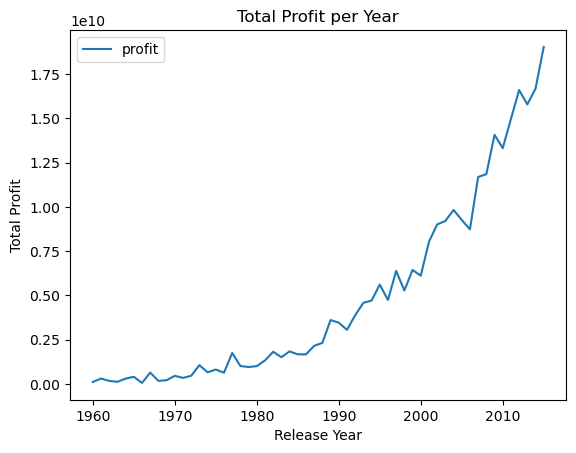

In [23]:
#This will create a line chart of the release year on the x-axis and the profit on the y-axis

profit_sum.plot(y='profit')
plt.title('Total Profit per Year')
plt.xlabel('Release Year')
plt.ylabel('Total Profit')
plt.legend()
plt.show()

This line chart shows a positive trend where the total profits for movies made in 2015 are greater than the total profits for movies made in 1960.

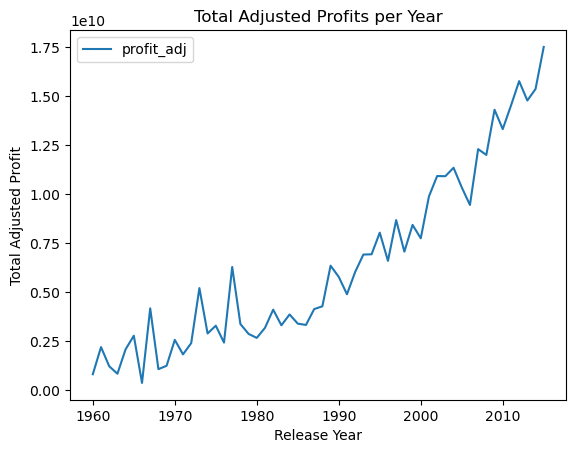

In [24]:
#This will create a line chart of the release year on the x-axis and the adjusted profit on the y-axis

profit_sum.plot(y='profit_adj')
plt.title('Total Adjusted Profits per Year')
plt.xlabel('Release Year')
plt.ylabel('Total Adjusted Profit')
plt.legend()
plt.show()

This line chart shows a positive trend where the total adjusted profits for movies made in 2015 are greater than the total profits for movies made in 1960.  Interestingly, there are a few years earlier on that show the movie industry made great profits compared to later years.  

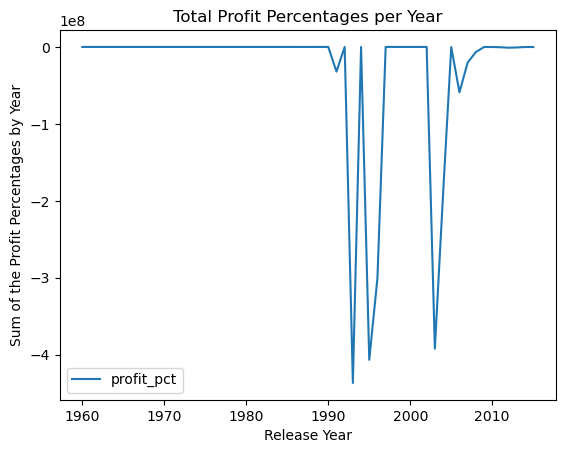

In [25]:
#This cell will create a line chart showing the profits as a percentage per year

profit_sum.plot(y='profit_pct')
plt.title('Total Profit Percentages per Year')
plt.xlabel('Release Year')
plt.ylabel('Sum of the Profit Percentages by Year')
plt.legend()
plt.show()

This chart shows total profits as a percentage of their revenue.  This chart is important to show that even though there was an upward trend in the total profits, several years later on posted several movies that tanked in the theaters, so the amount of profit made in those years had to be enormous comparatively.  

Research Question: Does an increase in the budget guarentee better profits?

In [32]:
#Here we are finding the averages of each column by year to explore this data

profit_avg = movies_df.groupby(['release_year']).mean('profit')
profit_avg

,id,popularity,budget,revenue,profit,profit_pct,profit_adj,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,4345.800000,1.324513,4.161390e+06,2.580100e+07,2.163961e+07,7.649200e+01,1.595481e+08,3.068179e+07,1.902299e+08
1961,11003.900000,0.787718,3.863700e+06,3.377202e+07,2.990832e+07,5.900200e+01,2.181770e+08,2.818516e+07,2.463622e+08
1962,3977.428571,0.983485,5.635714e+06,2.947569e+07,2.383998e+07,6.943000e+01,1.718493e+08,4.062476e+07,2.124740e+08
1963,7969.166667,1.040612,1.018583e+07,2.942115e+07,1.923531e+07,4.022333e+01,1.369589e+08,7.252496e+07,2.094838e+08
1964,4150.285714,1.377790,4.847880e+06,4.694479e+07,4.209691e+07,7.759714e+01,2.959526e+08,3.408189e+07,3.300344e+08
1965,5890.800000,1.054877,1.176000e+07,9.161637e+07,7.985637e+07,5.785800e+01,5.526511e+08,8.138583e+07,6.340369e+08
1966,4180.800000,0.395168,6.453600e+06,1.694734e+07,1.049374e+07,5.490400e+01,7.049708e+07,4.335538e+07,1.138525e+08
1967,8332.076923,0.953848,7.346154e+06,5.629497e+07,4.894882e+07,5.719923e+01,3.199669e+08,4.802007e+07,3.679869e+08
1968,9785.444444,0.913463,5.994444e+06,2.469131e+07,1.869686e+07,5.955333e+01,1.172100e+08,3.757895e+07,1.547889e+08


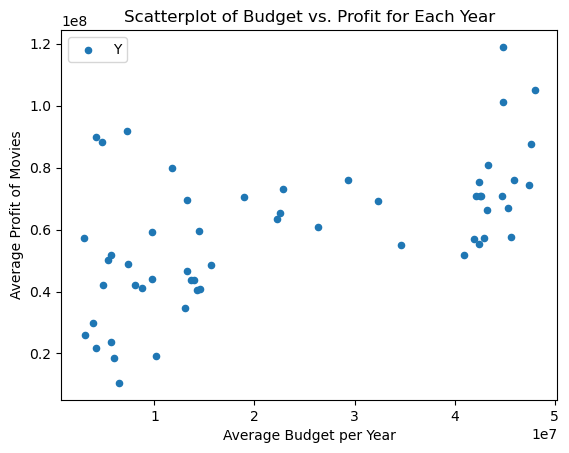

In [35]:
#This scatterplot will show the average budget per year vs. the average profit per year
#This should show an interesting correlation and answer our research question

profit_avg.plot.scatter(x='budget', y='profit')
plt.title('Scatterplot of Budget vs. Profit for Each Year')
plt.xlabel('Average Budget per Year')
plt.ylabel('Average Profit of Movies')
plt.legend('Year')
plt.show()

This scatterplot shows the total profits for the year when compared to the budget.  Each dot represents a year, so we can see that there is a weak correlation between the average budget for that year and the average amount of profit earned.

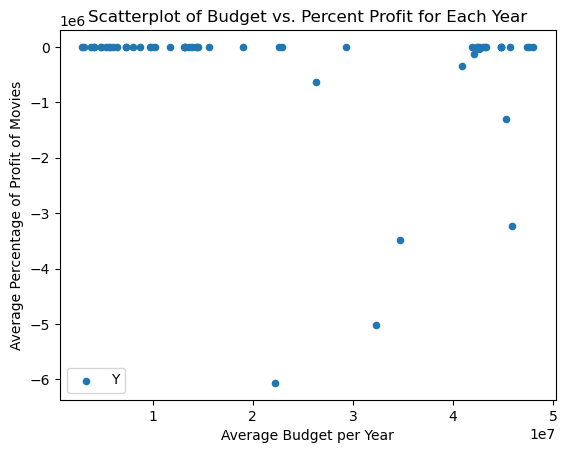

In [36]:
#This scatterplot will show just how bad some of the losses experienced could be

profit_avg.plot.scatter(x='budget', y='profit_pct')
plt.title('Scatterplot of Budget vs. Percent Profit for Each Year')
plt.xlabel('Average Budget per Year')
plt.ylabel('Average Percentage of Profit of Movies')
plt.legend('Year')
plt.show()

In this scatterplot, we can see that there are several years where movies acually grossed a negative amount of profit as a percentage.  This is actually very important because these losses are massive, and one of these values is 2015, when we look at the chart above.

Conclusion:

At the start of this analysis, I set out to answer the question, "Which year had the best profits for the movie industry?".  Through my analysis I had concluded that the best year for profits based on that years value in dollars, and the adjusted value of the dollar in the 2010's was the year 2015.  I also asked the question, "Does an increase in the budget guarentee better profits?".  I thought this would pose an interesting question to see how individual movies contributed to the whole value for the year.  Based on this dataset, a larger budget does not guarentee better profits.  There is a weak correlation that shows that generally the more money invested in a movie, the better the profits could be.  However, based on the scatterplots and the data tables created, we can see that even though 2015 boasted the best total profits, that was thanks to a few movies that performed well in theaters, but there were a few movies that posted negative numbers so large that they brought the average percentages down into the negatives.

I first imported the data into the notebook, and then cleaned the data to include only the columns needed.  I then removed any movies that were missing either the budget or the revenue values.  The data was then used to create two new columns to show the profits and the adjusted profits through vectorized operations of the revenue and budget columns in the dataframe.  Histograms and bar charts were created to show how the data stacked up across their basic statistical measurements and year to year earnings.  Finally, line charts were created to show the release year vs the profit to determine the best year for profits.

If the data were replaced with the real values of the movie's budget and revenue numbers, I think an interesting area to dive into the data would be looking at the profits based on director.  I would like to know which directors were more profitable, and what genres they directed that made them profitable.  
    

Limitations

The data set and the analysis are not without errors, which impacted the overall conclusion. The main source of error comes from the raw data itself. When looking at the raw data we could see there were some missing values, but after initial examinations, 50% of all the movies were missing just the budget value.  We can see that removing only values that contained 0 for the budget and the revenue, we were left with just 35.5% of the original data.  This is a huge limitation in the analysis, since more accurate data collection could have resulted in significant changes to many of the years, especially the farther back in time we looked.